# Chicago Airbnb - Regression Models

### Data set Description:

This dataset provides detailed information about Airbnb listings in Chicago, including the host, price, and availability of each listing. This dataset can be used to determine how much each list costs and when it is available to rent. It can also provide insight into which hosts are offering the most competitive prices and what type of accommodations they offer.

### Columns Information:

| **Variable Name** | **Description** |
|--|--|
|id | The id of the airbnb|
|name | The name of the airbnb|
|host_id | The id of the host|
|host_name | The name of the host|
|neighborhood | Which area is the airbnb belongs to|
|latitude | The latitude of the position|
|longitude | The longitude of the position|
|room_type | Entire home/apt, Private room or Other|
|price | The price of the apartment(per day)|
|minimum_nights | The least nights you need to book|
|number_of_reviews | The total number of the reviews on this dataset|
|last_review | The last review time|
|reviews_per_month | How many reviews the airbnb can receive per month|
|calculated_host_listings_count | The total listing number of the host|
|availability_365 | The available days|

### Goal:

Predicting the price of each Airbnb in Chicago

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data
data=pd.read_csv(r"C:\Users\srava\projects\chicago bnb\listings.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [4]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6.397000e+03,0.0,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,5265.000000,6397.000000,6397.000000
mean,2.813857e+07,9.850262e+07,NaN,41.899049,-87.664042,153.020009,8.113178,42.753791,1.745280,13.598718,174.272159
std,1.288337e+07,9.990222e+07,NaN,0.058929,0.042414,376.207706,22.786856,67.051609,1.745491,37.180574,138.877601
min,2.384000e+03,2.140000e+03,NaN,41.647360,-87.846810,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.875555e+07,1.705221e+07,NaN,41.872740,-87.687460,64.000000,1.000000,2.000000,0.430000,1.000000,36.000000
50%,2.994743e+07,5.738786e+07,NaN,41.901860,-87.660880,99.000000,2.000000,15.000000,1.230000,2.000000,161.000000
75%,3.959279e+07,1.580558e+08,NaN,41.939780,-87.633160,155.000000,3.000000,56.000000,2.570000,7.000000,329.000000
max,4.551558e+07,3.679071e+08,NaN,42.022510,-87.537520,10000.000000,500.000000,632.000000,32.430000,205.000000,365.000000


In [6]:
data.shape

(6397, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

In [8]:
# deleting neighbourhood_group because it is a null column and id column , host id,last_review
data=data.drop(["neighbourhood_group","id","host_id","last_review"],axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6397 non-null   object 
 1   host_name                       6397 non-null   object 
 2   neighbourhood                   6397 non-null   object 
 3   latitude                        6397 non-null   float64
 4   longitude                       6397 non-null   float64
 5   room_type                       6397 non-null   object 
 6   price                           6397 non-null   int64  
 7   minimum_nights                  6397 non-null   int64  
 8   number_of_reviews               6397 non-null   int64  
 9   reviews_per_month               5265 non-null   float64
 10  calculated_host_listings_count  6397 non-null   int64  
 11  availability_365                6397 non-null   int64  
dtypes: float64(3), int64(5), object(4)

In [10]:
# checking for null values
data.isnull().sum()

name                                 0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
data.reviews_per_month.value_counts(dropna=False)

reviews_per_month
NaN     1132
1.00      69
0.17      55
0.14      52
0.08      50
        ... 
7.03       1
4.04       1
4.31       1
7.81       1
8.00       1
Name: count, Length: 666, dtype: int64

In [12]:
data.reviews_per_month.describe()

count    5265.000000
mean        1.745280
std         1.745491
min         0.020000
25%         0.430000
50%         1.230000
75%         2.570000
max        32.430000
Name: reviews_per_month, dtype: float64

In [13]:
data.reviews_per_month=data.reviews_per_month.fillna(data.reviews_per_month.mean())

In [14]:
data.isnull().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
# checking for duplicate values
data.duplicated().value_counts()

False    6397
Name: count, dtype: int64

In [16]:
# checking for nan values
data.isna().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
data.neighbourhood.value_counts()

neighbourhood
West Town          725
Near North Side    683
Lake View          536
Logan Square       398
Loop               372
                  ... 
West Elsdon          2
West Pullman         2
South Deering        2
Edison Park          2
East Side            1
Name: count, Length: 77, dtype: int64

In [18]:
data.room_type.value_counts()

room_type
Entire home/apt    4401
Private room       1833
Shared room          90
Hotel room           73
Name: count, dtype: int64

## EDA

In [19]:
data.price.describe()

count     6397.000000
mean       153.020009
std        376.207706
min          0.000000
25%         64.000000
50%         99.000000
75%        155.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
print("Skewness:",data.price.skew())
print("Kurtosis:",data.price.kurt())

Skewness: 20.563742167410712
Kurtosis: 507.4152804163121


In [21]:
data.number_of_reviews.describe()

count    6397.000000
mean       42.753791
std        67.051609
min         0.000000
25%         2.000000
50%        15.000000
75%        56.000000
max       632.000000
Name: number_of_reviews, dtype: float64

In [22]:
print("Skewness:",data.number_of_reviews.skew())
print("Kurtosis:",data.number_of_reviews.kurt())

Skewness: 2.93840692596082
Kurtosis: 12.175404935117307


## Data Visualization

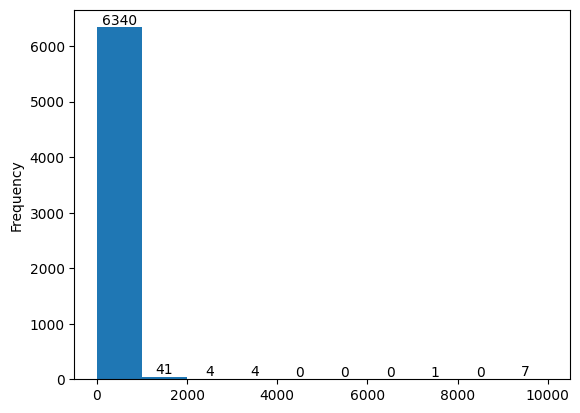

In [23]:
ax=data.price.plot(kind="hist")
for i in ax.containers:
    ax.bar_label(i,label_type="edge")

<Axes: >

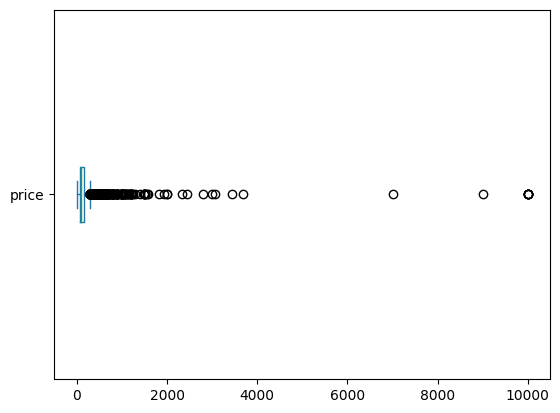

In [24]:
data.price.plot(kind="box",vert=False)

In [25]:
#removing outliers from price
df=data[data['price']>4000]

In [26]:
df.head(8)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
648,Single Bedroom in Wicker Park Modern Mansion,Kristina,West Town,41.90800,-87.67366,Private room,10000,20,30,0.49000,1,358
1245,Wrigleyville Mansion - Sleeps 16+,Joe,Lake View,41.95112,-87.67020,Entire home/apt,9999,7,16,0.40000,2,80
1707,Large 1 bedroom with Private Bath,Kyle,Lake View,41.93917,-87.64982,Private room,9999,80,2,0.05000,1,363
3938,"BIG Unit, Wrigleyville, Step to Wrigley, Metro",Harry,Lake View,41.95100,-87.65785,Entire home/apt,9000,2,0,1.74528,1,365
4144,Steps from Mag Mile - King Bed Boutique Hotel,St Jane,Loop,41.88714,-87.62413,Hotel room,9999,1,32,2.27000,3,168
4145,Steps from Mag Mile -Suite in Boutique Hotel,St Jane,Loop,41.88607,-87.62443,Hotel room,9999,1,3,0.22000,3,173
4146,Steps from Mag Mile - 2 Queen Beds Boutique Hotel,St Jane,Loop,41.88621,-87.62385,Hotel room,9999,1,22,1.59000,3,173
5558,"The Robey, Urban King Accessible",The Robey Hotel,West Town,41.91142,-87.67735,Private room,7000,1,0,1.74528,8,365


In [27]:
df.count()

name                              8
host_name                         8
neighbourhood                     8
latitude                          8
longitude                         8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
reviews_per_month                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [28]:
data = data.drop([648,1245,1707,3938,4144,4145,4146,5558],axis=0)

In [29]:
data.price.describe()

count    6389.000000
mean      141.316951
std       175.849014
min         0.000000
25%        64.000000
50%        99.000000
75%       155.000000
max      3690.000000
Name: price, dtype: float64

In [30]:
data.isnull().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [31]:
data=data.reset_index()

In [32]:
data=data.drop(['index'],axis=1)

<Axes: >

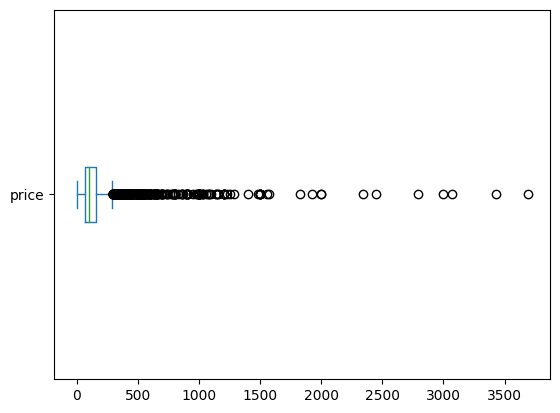

In [33]:
data.price.plot(kind="box",vert=False)

<Axes: >

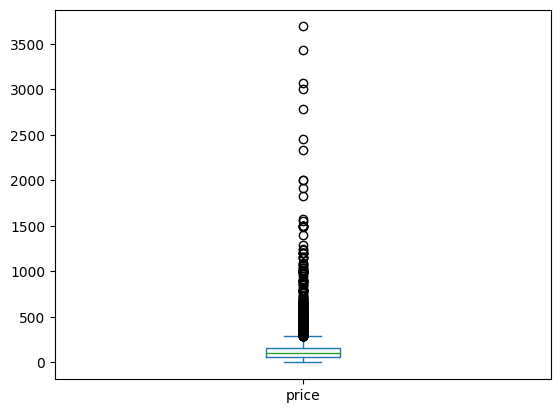

In [34]:
data.price.plot.box()

<Axes: ylabel='Density'>

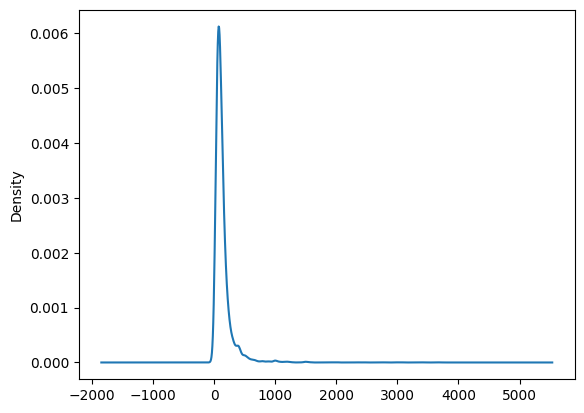

In [36]:
data.price.plot(kind="density")

<Figure size 3000x1500 with 0 Axes>

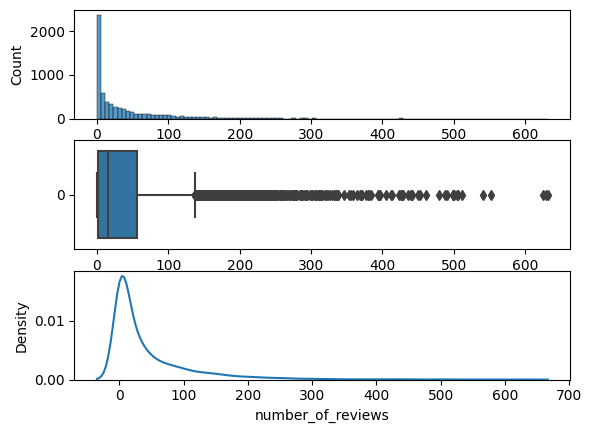

In [37]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(data.number_of_reviews,ax=ax[0])
sns.boxplot(data.number_of_reviews,orient="h",ax=ax[1])
sns.kdeplot(data.number_of_reviews,ax=ax[2])
plt.show()

In [38]:
# Frequency Distribution Table
pd.cut(data.price,bins=[0,50,100,150,200,250,300,400,450,500,1000,10000]
               ).value_counts().sort_index()


price
(0, 50]          1092
(50, 100]        2251
(100, 150]       1403
(150, 200]        677
(200, 250]        322
(250, 300]        157
(300, 400]        221
(400, 450]         57
(450, 500]         46
(500, 1000]       121
(1000, 10000]      41
Name: count, dtype: int64

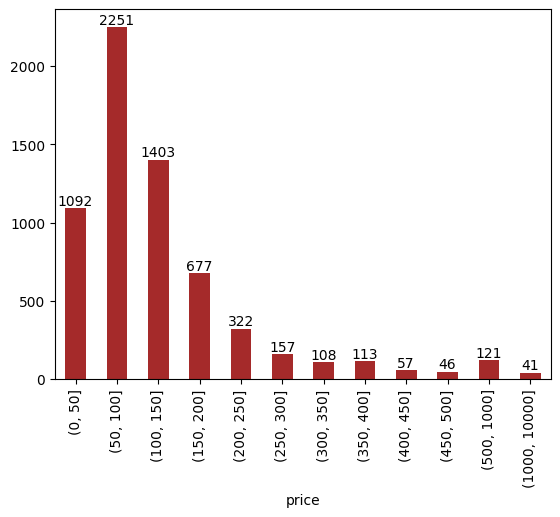

In [39]:
# Bar Plot for Frequency Distribution Table
ax=pd.cut(data.price,bins=[0,50,100,150,200,250,300,350,400,450,500,1000,10000]
         ).value_counts().sort_index().plot(kind="bar",color="brown")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [40]:
pd.crosstab(data.neighbourhood,data.room_type).sort_values(by="Entire home/apt",ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Near North Side,578,39,64,2
West Town,498,18,203,4
Lake View,399,10,106,18
Loop,337,0,31,1
Logan Square,313,0,83,2
...,...,...,...,...
Burnside,1,0,1,0
East Side,1,0,0,0
West Pullman,1,0,1,0


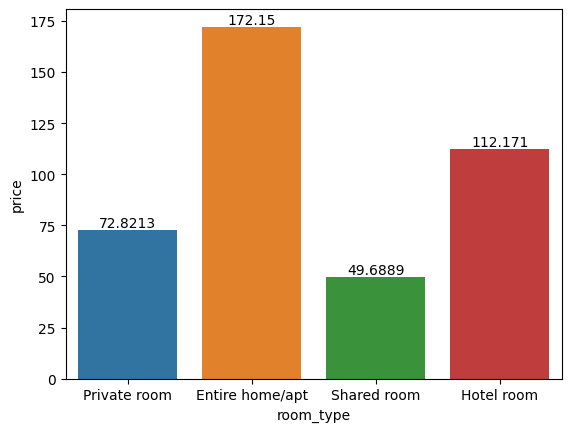

In [41]:
ax=sns.barplot(data,x="room_type",y="price",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='count'>

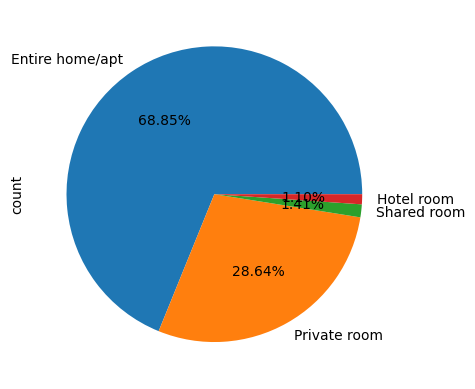

In [42]:
data.room_type.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: >

<Figure size 2000x2000 with 0 Axes>

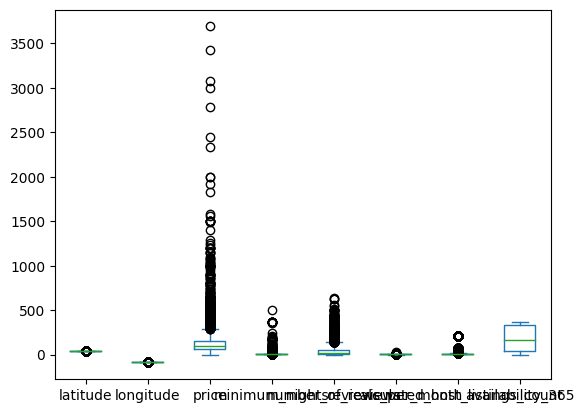

In [43]:
plt.figure(figsize=(20,20))
data.plot(kind="box")

## Data Aggregation

In [44]:
# What is the Average price of different room_type?
data.price.groupby(data.room_type).mean()

room_type
Entire home/apt    172.149807
Hotel room         112.171429
Private room        72.821311
Shared room         49.688889
Name: price, dtype: float64

In [45]:
# What is the Average price in different neighbourhood?
data.price.groupby(data.neighbourhood).mean()

neighbourhood
Albany Park        88.000000
Archer Heights     82.833333
Armour Square     132.940299
Ashburn            71.307692
Auburn Gresham    125.166667
                     ...    
West Lawn          37.900000
West Pullman       95.000000
West Ridge         85.608696
West Town         156.331950
Woodlawn           69.702381
Name: price, Length: 77, dtype: float64

In [46]:
# What is the Median number_of_reviews for each neighborhood?
data.number_of_reviews.groupby(data.neighbourhood).median().sort_values(ascending=False)

neighbourhood
Edison Park       122.0
Gage Park         114.0
Oakland            76.5
West Lawn          62.0
Jefferson Park     44.5
                  ...  
Clearing            1.0
West Pullman        1.0
Loop                1.0
West Englewood      0.0
Riverdale           0.0
Name: number_of_reviews, Length: 77, dtype: float64

In [47]:
# What is the Average Price based on neighborhood and roon_type
pd.set_option("display.max_rows",182)
data.price.groupby([data.neighbourhood,data.room_type]).mean()

neighbourhood           room_type      
Albany Park             Entire home/apt     135.166667
                        Private room         50.763158
Archer Heights          Entire home/apt      89.000000
                        Private room         76.666667
Armour Square           Entire home/apt     239.800000
                        Private room         46.297297
Ashburn                 Entire home/apt      99.428571
                        Private room         38.500000
Auburn Gresham          Entire home/apt     229.500000
                        Private room         73.000000
Austin                  Entire home/apt     146.962963
                        Private room         37.227273
Avalon Park             Entire home/apt     121.333333
                        Private room         45.000000
Avondale                Entire home/apt     159.879630
                        Private room         63.114286
                        Shared room          30.000000
Belmont Cragin          E

In [48]:
pd.pivot_table(data,values="price",columns="room_type",index="neighbourhood")

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Albany Park,135.166667,NaN,50.763158,NaN
Archer Heights,89.000000,NaN,76.666667,NaN
Armour Square,239.800000,NaN,46.297297,NaN
Ashburn,99.428571,NaN,38.500000,NaN
Auburn Gresham,229.500000,NaN,73.000000,NaN
Austin,146.962963,NaN,37.227273,NaN
Avalon Park,121.333333,NaN,45.000000,NaN
Avondale,159.879630,NaN,63.114286,30.000000
Belmont Cragin,83.615385,NaN,93.727273,57.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6389 non-null   object 
 1   host_name                       6389 non-null   object 
 2   neighbourhood                   6389 non-null   object 
 3   latitude                        6389 non-null   float64
 4   longitude                       6389 non-null   float64
 5   room_type                       6389 non-null   object 
 6   price                           6389 non-null   int64  
 7   minimum_nights                  6389 non-null   int64  
 8   number_of_reviews               6389 non-null   int64  
 9   reviews_per_month               6389 non-null   float64
 10  calculated_host_listings_count  6389 non-null   int64  
 11  availability_365                6389 non-null   int64  
dtypes: float64(3), int64(5), object(4)

## Hypothesis Testing

##### Test the Null Average Price of different room types

In [50]:
data.price.groupby(data.room_type).mean()

room_type
Entire home/apt    172.149807
Hotel room         112.171429
Private room        72.821311
Shared room         49.688889
Name: price, dtype: float64

In [51]:
#Null:There is no significante difference between average price for different rooms
#Alternate:There is a significante difference between average price for different rooms

In [52]:
entire=data[data.room_type=="Entire home/apt"]
hotel=data[data.room_type=="Hotel room"]
private=data[data.room_type=="Private room"]
shared=data[data.room_type=="Shared room"]

In [53]:
from scipy.stats import f_oneway

In [54]:
f_oneway(entire.price,hotel.price,private.price,shared.price)

F_onewayResult(statistic=157.15287470273987, pvalue=2.828381901412185e-98)

In [55]:
# since pvalue=2.5550788965214003e-32 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significante difference between average price for different rooms

In [56]:
numcols=data.select_dtypes(include=np.number)
objcols=data.select_dtypes(include=["object"])

In [57]:
numcols.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [58]:
objcols.columns

Index(['name', 'host_name', 'neighbourhood', 'room_type'], dtype='object')

In [59]:
print(numcols.shape)
print(objcols.shape)

(6389, 8)
(6389, 4)


In [60]:
numcols.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [61]:
objcols.isnull().sum()

name             0
host_name        0
neighbourhood    0
room_type        0
dtype: int64

In [62]:
objcols=objcols.drop(['name', 'host_name'],axis=1)

In [63]:
objcols.shape

(6389, 2)

In [64]:
numcols.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,41.78790,-87.58780,60,2,178,2.56,1,353
1,41.85495,-87.69696,105,2,395,2.81,1,155
2,41.90289,-87.68182,60,2,384,2.81,1,321
3,41.91769,-87.63788,65,4,49,0.63,9,300
4,41.79612,-87.59261,21,1,44,0.61,5,168


In [65]:
y=numcols.price

In [66]:
numcols=numcols.drop("price",axis=1)

In [67]:
numcols.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000,6389.000000
mean,41.899029,-87.664060,8.105650,42.790891,1.746133,13.612302,174.170293
std,0.058955,0.042431,22.782058,67.083863,1.584064,37.201786,138.879388
min,41.647360,-87.846810,1.000000,0.000000,0.020000,1.000000,0.000000
25%,41.872660,-87.687510,1.000000,2.000000,0.570000,1.000000,36.000000
50%,41.901860,-87.660880,2.000000,15.000000,1.740000,2.000000,161.000000
75%,41.939780,-87.633160,3.000000,56.000000,2.220000,7.000000,329.000000
max,42.022510,-87.537520,500.000000,632.000000,32.430000,205.000000,365.000000


In [68]:
numcols.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.514316,-0.013517,0.062352,0.024518,-0.052669,-0.055401
longitude,-0.514316,1.000000,0.104288,-0.092507,-0.050255,0.207508,0.047937
minimum_nights,-0.013517,0.104288,1.000000,-0.126462,-0.105639,0.212548,0.156981
number_of_reviews,0.062352,-0.092507,-0.126462,1.000000,0.677159,-0.153644,0.013198
reviews_per_month,0.024518,-0.050255,-0.105639,0.677159,1.000000,-0.024113,0.018302
calculated_host_listings_count,-0.052669,0.207508,0.212548,-0.153644,-0.024113,1.000000,0.192102
availability_365,-0.055401,0.047937,0.156981,0.013198,0.018302,0.192102,1.000000


<Axes: >

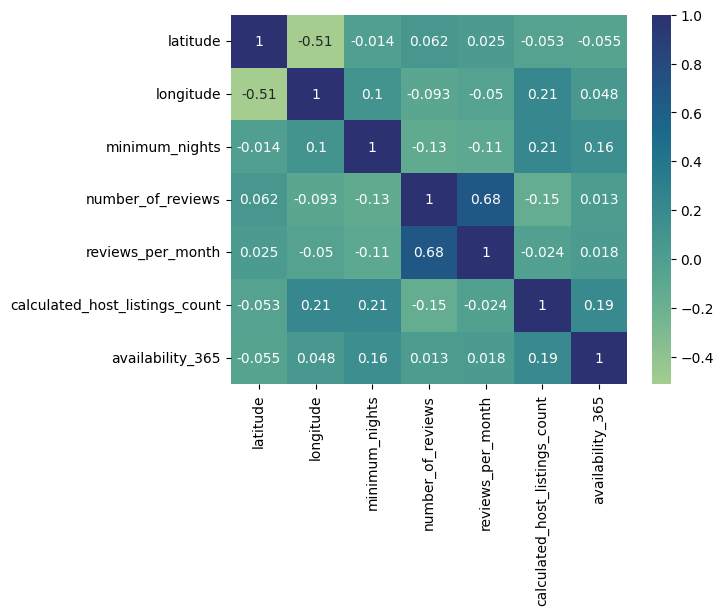

In [69]:
sns.heatmap(numcols.corr(),annot=True,cmap="crest")

### Scaling

In [70]:
from sklearn.preprocessing import RobustScaler

In [71]:
robust=RobustScaler()

In [72]:
numcols_robust=robust.fit_transform(numcols)

In [73]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [74]:
numcols_robust.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.697855,1.344618,0.0,3.018519,0.496970,-0.166667,0.655290
1,-0.698897,-0.663845,0.0,7.037037,0.648485,-0.166667,-0.020478
2,0.015346,-0.385281,0.0,6.833333,0.648485,-0.166667,0.546075
3,0.235846,0.423183,1.0,0.629630,-0.672727,1.166667,0.474403
4,-1.575387,1.256118,-0.5,0.537037,-0.684848,0.500000,0.023891


In [75]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

In [76]:
objcols_encoded=objcols.apply(LabelEncoder().fit_transform)

In [77]:
objcols_encoded.head()

,neighbourhood,room_type
0,33,2
1,64,0
2,75,0
3,38,0
4,33,2


In [78]:
objcols_encoded.isnull().sum()

neighbourhood    0
room_type        0
dtype: int64

In [79]:
numcols_robust.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [80]:
print(numcols_robust.shape)
print(objcols_encoded.shape)

(6389, 7)
(6389, 2)


In [81]:
combinedf=pd.concat([numcols_robust,objcols_encoded],axis=1)

In [82]:
combinedf.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,room_type
0,-1.697855,1.344618,0.0,3.018519,0.496970,-0.166667,0.655290,33,2
1,-0.698897,-0.663845,0.0,7.037037,0.648485,-0.166667,-0.020478,64,0
2,0.015346,-0.385281,0.0,6.833333,0.648485,-0.166667,0.546075,75,0
3,0.235846,0.423183,1.0,0.629630,-0.672727,1.166667,0.474403,38,0
4,-1.575387,1.256118,-0.5,0.537037,-0.684848,0.500000,0.023891,33,2


In [83]:
combinedf.tail()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,room_type
6384,-0.687128,0.658878,0.0,-0.277778,0.0032,0.333333,0.064846,48,0
6385,-0.689064,0.689236,0.0,-0.277778,0.0032,0.333333,0.064846,48,0
6386,-0.685638,0.677829,0.0,-0.277778,0.0032,0.333333,0.054608,48,0
6387,-0.175954,-0.106716,15.0,-0.277778,0.0032,-0.166667,-0.266212,75,2
6388,-1.075983,0.743330,-0.5,-0.277778,0.0032,-0.166667,0.030717,17,0


In [84]:
combinedf.shape

(6389, 9)

In [85]:
combinedf.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood                     0
room_type                         0
dtype: int64

In [86]:
X=combinedf

## Model Building

#### Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
reg=LinearRegression()

In [89]:
regmodel=reg.fit(X,y)

In [90]:
regmodel.score(X,y)

0.10603730277858792

In [91]:
regpredict=regmodel.predict(X)

In [92]:
regresidual=y-regpredict

In [93]:
np.sqrt(np.mean(regresidual**2))# RMSE

166.2515285320472

### Square Root Transformation

In [94]:
regmodel_2=reg.fit(X,np.sqrt(y))

In [95]:
regmodel_2.score(X,np.sqrt(y))

0.23569054634271402

In [96]:
regpredict_2=regmodel_2.predict(X)

In [97]:
regresidual_2=y-regpredict_2

In [98]:
np.sqrt(np.mean(regresidual_2**2))# RMSE

218.3379528546081

### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
tree=DecisionTreeRegressor(max_depth=12)

In [132]:
treemodel=tree.fit(X,y)

In [133]:
treemodel.score(X,y)

0.8037219853606259

In [141]:
treepredict=treemodel.predict(X)

In [142]:
treeresidual=y-treepredict

In [143]:
np.sqrt(np.mean(treeresidual**2))

77.90077468893608

#### Random Forest

In [259]:
from sklearn.ensemble import RandomForestRegressor

In [260]:
random=RandomForestRegressor(n_estimators=2000,max_depth=12)

In [261]:
randommodel=random.fit(X,y)

In [262]:
randommodel.score(X,y)

0.7684156786999049

In [135]:
randompredict=randommodel.predict(X)

In [136]:
randomresidual=y-randompredict

In [137]:
np.sqrt(np.mean(randomresidual**2))#RMSE

84.52718913402306

#### Gradient Boosting

In [137]:
from sklearn.ensemble import GradientBoostingRegressor

In [160]:
gbr=GradientBoostingRegressor(n_estimators=600,max_depth=4)

In [161]:
gbrmodel=gbr.fit(X,y)

In [162]:
gbrmodel.score(X,y)

0.8519766083246745

In [163]:
gbrpredict=gbrmodel.predict(X)

In [164]:
gbrresidual=y-gbrpredict

In [165]:
np.sqrt(np.mean(gbrresidual**2))#RMSE

67.65051761394547

#### Support Vector Machine

In [166]:
from sklearn.svm import LinearSVR

In [231]:
lsvr=LinearSVR(C=2)

In [232]:
lsvrmodel=lsvr.fit(X,np.sqrt(y))

C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\srava\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [233]:
lsvrmodel.score(X,np.sqrt(y))

0.15871630256065916

In [234]:
lsvrpredict=lsvrmodel.predict(X)

In [235]:
lsvrresidual=y-lsvrpredict

In [236]:
np.sqrt(np.mean(lsvrresidual**2))#RMSE

219.17892172875472

### KNN 

In [237]:
from sklearn.neighbors import KNeighborsRegressor

In [253]:
knn = KNeighborsRegressor(n_neighbors=2)

In [254]:
knnmodel=knn.fit(X,y)

In [255]:
knnmodel.score(X,y)

0.6626610320599629

In [256]:
knnpredict = knnmodel.predict(X)

In [257]:
knnresidual = y - knnpredict

In [258]:
np.sqrt(np.mean(knnresidual**2))

102.12667776423457

# Summary

After building and evaluating various machine learning models for the House Prices dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

| Model Name | R_square | RMSE |
|--|--|--|
| Linear Regression | 0.10603730277858792 |166.2515285320472| 
| Decision Tree | 0.8037219853606259 | 77.90077468893608 |
| Random Forest | 0.7684156786999049 | 84.52718913402306 |
| **Gradient Boosting Machine** | **0.8519766083246745** | **67.65051761394547** |
| Support Vector Machine | 0.15871630256065916 | 219.17892172875472 |
| k-nearest neighbors | 0.6626610320599629 | 102.12667776423457 |

The "Gradient Boosting Machines" model stands out with a significantly lower RMSE score compared to its counterparts, indicating its superior predictive performance for this dataset. Despite a lower accuracy score, the lower RMSE value suggests that the Gradient Boosting Machines model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Gradient Boosting Machines model as a more reliable option for regression analysis on the Chicago Airbnb dataset, prioritizing RMSE as the key performance indicator scores.